In [408]:
import numpy as np
import pandas as pd
from pandas import DataFrame
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

#### Yearly changes

In [440]:
power5 = ["Boston College", "Baylor", "Illinois", "Arizona", "Alabama", "Clemson", "Iowa State", "Indiana", "Arizona State", "Arkansas", "Duke", "Kansas", "Iowa", "California", "Auburn", "Florida State", "Kansas State", "Maryland", "UCLA", "Florida", "Georgia Tech", "Oklahoma", "Michigan", "Colorado", "Georgia", "Louisville", "Oklahoma State", "Michigan State", "Oregon", "Kentucky", "Miami", "TCU", "Minnesota", "Oregon State", "LSU", "North Carolina", "Texas", "Nebraska", "USC", "Mississippi", "North Carolina State", "Texas Tech", "Northwestern", "Stanford", "Mississippi State", "Pittsburgh", "West Virginia", "Ohio State", "Utah", "Missouri", "Syracuse", "Penn State", "Washington", "South Carolina", "Virginia", "Purdue", "Washington State", "Tennessee", "Virginia Tech", "Rutgers", "Texas A&M", "Wake Forest", "Wisconsin", "Vanderbilt", "Notre Dame"]

In [441]:
print len(power5)

65


In [411]:
def got_fired_following_season(team):
    team_totals = df[df['Team'] == team]
    for line in open("yearly_changes_by_team2003.csv", "r"):
        if line.split(",")[0] == team:
            years = line.split(",")[1:]
            for year in years:
                year = year.strip()
                df.loc[(df['Team']== team) & (df['Year']== str(int(year) - 2)), 'LeavesNextYr'] = 1
    return df



def tenure(team):
    team_df = df[df['Team'] == team]
    year_min = team_df[team_df['LeavesNextYr'] == 1]
    years = year_min['Year'].tolist()
    if len(years) > 0: #The Bob Stoops exception
        
        years.sort()
        min_year = years[0]
        year = int(min_year)
        counter = 0
        while year <= 2015:
            if int(year) - 1 in map(int, years):
                counter = 1
                df.loc[(df['Year'] == str(year)) & (df['Team'] == team), 'Tenure'] = 0
            else:
                df.loc[(df['Year'] == str(year)) & (df['Team'] == team), 'Tenure'] = counter
                counter += 1
            year += 1
        
    return df


def expectations(team, year):
    team_df = df[df['Team'] == team]
    first_year = int(year) - 6
    total_wins = 0
    total_games = 0
    for season in range(first_year, year):
        wins = team_df.loc[(team_df['Year'] == str(season)), 'Wins']
        games = team_df.loc[(team_df['Year'] == str(season)), 'Games']
        try:
            total_wins += int(wins)
            total_games += int(games)
        except TypeError:
            total_wins += 0
            total_games += 0
    try:
        expectations = float(total_wins)/total_games
    except ZeroDivisionError:
        expectations = 5
    df.loc[(df['Year'] == str(year)) & (df['Team'] == team), 'PreSeasonExpectations'] = expectations
    return df

In [412]:
import glob

columns = ["Team","Wins","Losses","Ties","Games","WinPct", "Year"]

df = pd.DataFrame(columns=columns)


for filename in glob.glob("*records.csv"):
    year = filename.split("_")[0]
    f = DataFrame.from_csv(filename, header = None, index_col=False)
    f['Year'] = year
    f.columns = columns
    dfs = [df, f]
    df = pd.concat(dfs)
df = df.reset_index()
del df['index']


df['LeavesNextYr'] = 0
df['Tenure'] = 0
df['PreSeasonExpectations'] = 0
df['IsPower5'] = 0


In [413]:
for index, row in df.iterrows():
    if row['Team'] in power5:
        df.ix[index, 'IsPower5'] = 1

In [414]:
teams = df['Team'].unique()

for team in teams:
    df = got_fired_following_season(team)
    tenure(team)
    

In [415]:
seasons = [2001, 2002, 2003, 2004, 2005, 2006, 2007, 2008, 2009, 2010, 2011, 2012, 2013, 2014, 2015]
for season in seasons:
    for team in teams:
        expectations(team, season)

# Clean Data, Separate Training and Test Sets

In [416]:
df[['Year','Tenure']] = df[['Year','Tenure']].apply(pd.to_numeric)
df['ExpVsReality'] = df['WinPct'] - df['PreSeasonExpectations']
training_set = df[df['Tenure'] > 0]
test_set = training_set[training_set['Year'] == 2015]
training_set = training_set[training_set['Year'] < 2015]
training_set = training_set.reset_index()
del training_set['index']
training_set

,Team,Wins,Losses,Ties,Games,WinPct,Year,LeavesNextYr,Tenure,PreSeasonExpectations,IsPower5,ExpVsReality
0,Utah,10.0,2.0,0.0,12.0,0.83333,2003,1,1,0.573529,1,0.259801
1,Bowling Green,11.0,3.0,0.0,14.0,0.78571,2003,0,1,0.477612,0,0.308098
2,Louisville,9.0,4.0,0.0,13.0,0.69231,2003,0,1,0.575342,1,0.116968
3,Oregon State,8.0,5.0,0.0,13.0,0.61538,2003,0,1,0.557143,1,0.058237
4,Tulsa,8.0,5.0,0.0,13.0,0.61538,2003,0,1,0.220588,0,0.394792
5,Houston,7.0,6.0,0.0,13.0,0.53846,2003,0,1,0.313433,0,0.225027
6,Washington,6.0,6.0,0.0,12.0,0.50000,2003,1,1,0.643836,1,-0.143836
7,UCLA,6.0,7.0,0.0,13.0,0.46154,2003,0,1,0.633803,1,-0.172263
8,Texas A&M,4.0,8.0,0.0,12.0,0.33333,2003,0,1,0.653333,1,-0.320003
9,Wyoming,4.0,8.0,0.0,12.0,0.33333,2003,0,1,0.405797,0,-0.072467


# Prepare Balanced Training Set

First, select all minority class data. Then, randomly select majority class samples (without replacement) and compile. Then, shuffle the data set to randomly order majority and minority classes.

In [417]:
canned = training_set[training_set['LeavesNextYr'] == 1]
kept = training_set[training_set['LeavesNextYr'] == 0]
training_kept = kept.sample(n=canned.shape[0])
training_kept = training_kept.reset_index(drop = True)


In [418]:
training_data = pd.concat([training_kept, canned])
training_data = training_data.reset_index(drop = True)
training_data = training_data.reindex(np.random.permutation(training_data.index))
training_data = training_data.reset_index(drop=True)
training_data

,Team,Wins,Losses,Ties,Games,WinPct,Year,LeavesNextYr,Tenure,PreSeasonExpectations,IsPower5,ExpVsReality
0,Rutgers,9.0,5.0,0.0,14.0,0.64286,2014,1,3,0.584416,1,0.058444
1,Western Kentucky,7.0,5.0,0.0,12.0,0.58333,2011,1,2,0.229167,0,0.354163
2,Akron,5.0,7.0,0.0,12.0,0.41667,2013,0,2,0.208333,0,0.208337
3,Nebraska,8.0,4.0,0.0,12.0,0.66667,2005,0,2,0.723684,1,-0.057014
4,Temple,9.0,4.0,0.0,13.0,0.69231,2009,1,4,0.185714,0,0.506596
5,Southern Miss,7.0,6.0,0.0,13.0,0.53846,2008,0,1,0.597403,0,-0.058943
6,Wisconsin,9.0,4.0,0.0,13.0,0.69231,2007,0,2,0.662338,1,0.029972
7,Marshall,13.0,1.0,0.0,14.0,0.92857,2014,0,5,0.500000,0,0.428570
8,Navy,9.0,4.0,0.0,13.0,0.69231,2010,0,3,0.688312,0,0.003998
9,Louisiana-Monroe,6.0,6.0,0.0,12.0,0.50000,2007,0,5,0.289855,0,0.210145


In [419]:
features_training = training_data[["Tenure", "ExpVsReality", 'IsPower5']]
outcome_training = training_data["LeavesNextYr"]


In [420]:
from sklearn.cross_validation import cross_val_score
from sklearn import preprocessing
from sklearn.linear_model import LogisticRegression
from sklearn import svm
from sklearn.neighbors import NearestNeighbors
from sklearn.ensemble import RandomForestClassifier 
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import StandardScaler

In [421]:
scaler = StandardScaler()
features_training = scaler.fit_transform(features_training)
print X_scaled.shape, outcome_training.shape

(306, 3) (306,)


In [422]:
logreg2 = LogisticRegression()
scores=cross_val_score(logreg2, features_training, outcome_training, cv=10, scoring='accuracy')
print scores
print scores.mean()

[ 0.40625     0.5625      0.59375     0.6         0.53333333  0.43333333
  0.66666667  0.56666667  0.46666667  0.66666667]
0.549583333333


In [423]:
rf_model2 = RandomForestClassifier()
scores=cross_val_score(rf_model2, features_training, outcome_training, cv=10, scoring='accuracy')
print scores
print scores.mean()

[ 0.625       0.5         0.625       0.66666667  0.5         0.53333333
  0.73333333  0.53333333  0.53333333  0.56666667]
0.581666666667


In [424]:
svm_model2=svm.SVC(probability = True)
scores=cross_val_score(svm_model2, features_training, outcome_training, cv=10, scoring='accuracy')
print scores
print scores.mean()

[ 0.59375     0.625       0.6875      0.7         0.56666667  0.6
  0.73333333  0.56666667  0.56666667  0.53333333]
0.617291666667


In [425]:
k_range=range(1,51)
k_scores1=[]
for k in k_range:
    knn1 = KNeighborsClassifier(n_neighbors=k)
    scores=cross_val_score(knn1, features_training, outcome_training, cv=10, scoring='accuracy')
    k_scores1.append(scores.mean())
#print k_scores1
avg_kscore = sum(k_scores1)/len(k_scores1)
print avg_kscore

0.611925


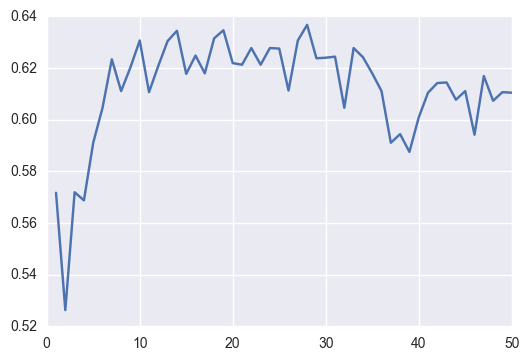

In [426]:
plt.plot(k_range, k_scores1)
plt.show()

In [427]:
test_data = test_set[["Tenure", "ExpVsReality", 'IsPower5']]

In [428]:
svm_model2.fit(features_training, outcome_training)

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape=None, degree=3, gamma='auto', kernel='rbf',
  max_iter=-1, probability=True, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

In [429]:
features_test = scaler.transform(test_data)


In [430]:
bu = test_set.reset_index(drop=True)
bu['pFired'] = 0

In [431]:
max_prob = 0
spot = 0
for n in range(0,len(features_test)):
    stats = features_test[n].tolist()
    prob_fired = svm_model2.predict_proba([stats])[0][1]
    bu.ix[n, 'pFired'] = prob_fired


In [432]:
bu[bu['pFired'] > 0.65]

,Team,Wins,Losses,Ties,Games,WinPct,Year,LeavesNextYr,Tenure,PreSeasonExpectations,IsPower5,ExpVsReality,pFired
26,Oregon,9.0,4.0,0.0,13.0,0.69231,2015,0,3,0.864198,1,-0.171888,0.673362
34,Akron,8.0,5.0,0.0,13.0,0.61538,2015,0,4,0.222222,0,0.393158,0.660455
46,New Mexico,7.0,6.0,0.0,13.0,0.53846,2015,0,4,0.191781,0,0.346679,0.664460
49,Middle Tennessee State,7.0,6.0,0.0,13.0,0.53846,2015,0,10,0.533333,0,0.005127,0.658707
53,Arizona State,6.0,7.0,0.0,13.0,0.46154,2015,0,4,0.571429,1,-0.109889,0.680612
64,Rice,5.0,7.0,0.0,12.0,0.41667,2015,0,9,0.460526,0,-0.043856,0.652839
68,Louisiana-Lafayette,4.0,8.0,0.0,12.0,0.33333,2015,0,5,0.592105,0,-0.258775,0.694710
73,Fresno State,3.0,9.0,0.0,12.0,0.25000,2015,0,4,0.582278,0,-0.332278,0.691621
75,Miami-Ohio,3.0,9.0,0.0,12.0,0.25000,2015,0,5,0.283784,0,-0.033784,0.690352
80,Boston College,3.0,9.0,0.0,12.0,0.25000,2015,0,3,0.460526,1,-0.210526,0.695341


In [437]:
bu.sort(['pFired'])

/opt/local/Library/Frameworks/Python.framework/Versions/2.7/lib/python2.7/site-packages/ipykernel/__main__.py:1: FutureWarning: sort(columns=....) is deprecated, use sort_values(by=.....)
  if __name__ == '__main__':


,Team,Wins,Losses,Ties,Games,WinPct,Year,LeavesNextYr,Tenure,PreSeasonExpectations,IsPower5,ExpVsReality,pFired
36,Duke,8.0,5.0,0.0,13.0,0.61538,2015,0,8,0.473684,1,0.141696,0.295225
20,Florida,10.0,4.0,0.0,14.0,0.71429,2015,0,1,0.649351,1,0.064939,0.303484
23,Mississippi State,9.0,4.0,0.0,13.0,0.69231,2015,0,7,0.597403,1,0.094907,0.303498
37,Pittsburgh,8.0,5.0,0.0,13.0,0.61538,2015,0,1,0.551282,1,0.064098,0.303608
16,Wisconsin,10.0,3.0,0.0,13.0,0.76923,2015,0,1,0.740741,1,0.028489,0.310941
1,Clemson,14.0,1.0,0.0,15.0,0.93333,2015,0,7,0.712500,1,0.220830,0.314185
17,Michigan,10.0,3.0,0.0,13.0,0.76923,2015,0,1,0.565789,1,0.203441,0.315526
74,UNLV,3.0,9.0,0.0,12.0,0.25000,2015,0,1,0.263158,0,-0.013158,0.334743
48,Central Michigan,7.0,6.0,0.0,13.0,0.53846,2015,0,1,0.500000,0,0.038460,0.338436
62,Buffalo,5.0,7.0,0.0,12.0,0.41667,2015,0,1,0.375000,0,0.041670,0.339075


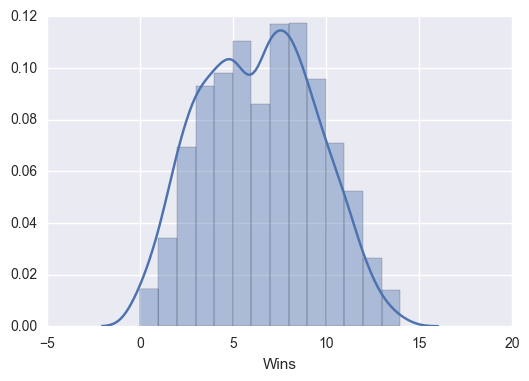

In [19]:
sns.distplot(df['Wins'], bins = 14)

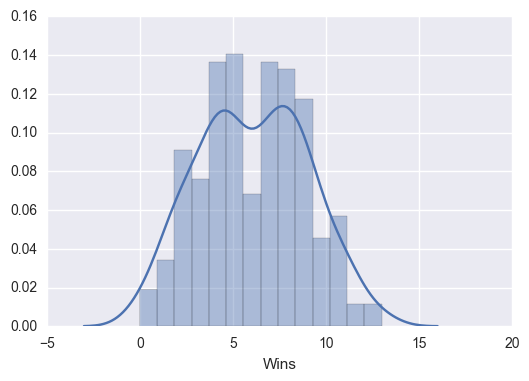

In [20]:
canned = df[df['LeavesNextYr'] == 1]
sns.distplot(canned['Wins'], bins = 14)

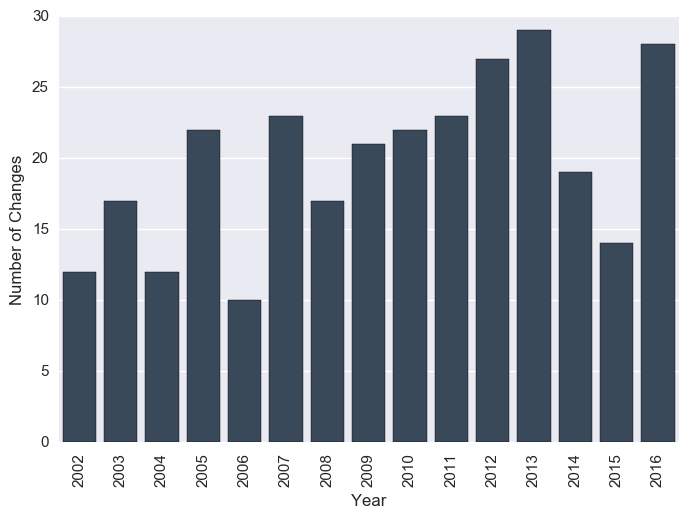

In [21]:
changes = pd.read_csv("~/Documents/310analytics/github/hot_seat_2016/yearly_turnover.csv")
df = pd.DataFrame(changes)

sns.set_context("notebook", font_scale=1.1)

yearly_plot=sns.barplot(x='Year', y='Number of Changes', data=df, color="#34495e")

yearly_plot.set_ylabel("Number of Changes")

for item in yearly_plot.get_xticklabels():
    item.set_rotation(90)
plt.show()